# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.io.stata.read_stata(r"C:\Users\paro\Desktop\EDA_racial_discrimination\data\us_job_market_discrimination.dta")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [4]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.isnull()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

id                       0
ad                       0
education                0
ofjobs                   0
yearsexp                 0
honors                   0
volunteer                0
military                 0
empholes                 0
occupspecific            0
occupbroad               0
workinschool             0
email                    0
computerskills           0
specialskills            0
firstname                0
sex                      0
race                     0
h                        0
l                        0
call                     0
city                     0
kind                     0
adid                     0
fracblack               86
fracwhite               86
lmedhhinc               86
fracdropout             86
fraccolp                86
linc                    86
                      ... 
parent_emp            3148
branch_sales          4262
branch_emp            4212
fed                   1768
fracblack_empzip      2952
fracwhite_empzip      2952
l

In [7]:
data.isna().sum()

id                       0
ad                       0
education                0
ofjobs                   0
yearsexp                 0
honors                   0
volunteer                0
military                 0
empholes                 0
occupspecific            0
occupbroad               0
workinschool             0
email                    0
computerskills           0
specialskills            0
firstname                0
sex                      0
race                     0
h                        0
l                        0
call                     0
city                     0
kind                     0
adid                     0
fracblack               86
fracwhite               86
lmedhhinc               86
fracdropout             86
fraccolp                86
linc                    86
                      ... 
parent_emp            3148
branch_sales          4262
branch_emp            4212
fed                   1768
fracblack_empzip      2952
fracwhite_empzip      2952
l

In [8]:
data.duplicated().sum()

0

In [9]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [10]:
data.sample(10)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
4401,a,79b,4,5,26,0,0,0,0,13,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Private
2225,b,228,4,4,11,0,0,0,1,387,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Private
4343,77,7,4,6,8,0,1,0,0,267,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Public
1706,b,197,3,5,4,0,0,0,1,443,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,
1105,b,15,4,4,6,0,1,0,1,195,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,
4823,b,91,3,3,7,0,0,0,1,385,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,
893,b,14,4,4,11,0,0,0,1,329,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4476,b,8,3,2,1,0,0,0,1,313,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Private
611,b,12,4,1,11,0,0,0,0,19,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4002,b,6,4,4,8,0,1,0,0,34,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,


# Examining the columns of interest in the data which are "call" and "race".

In [11]:
#NULL count for the call column:
print("NULL observations for 'call':", data.call.isnull().sum())

# NULL count for the race column:
print("NULL observations for 'race':", data.race.isnull().sum())

NULL observations for 'call': 0
NULL observations for 'race': 0


In [12]:
# Total rows / resumes having race with 'b' values
print("TOTAL observations for 'race with b values':", sum(data['race']=='b'))

# Total rows / resumes having race with 'w' values
print("TOTAL observations for 'race with w values':", sum(data['race']=='w'))

# Total number of calls for resumes for race with a 'b' value
print("TOTAL observations for calls having 'race with b values':",sum(data[data.race=='b'].call))

# Total number of calls for resumes for race with a 'w' value
print("TOTAL observations for calls having 'race with w values':",sum(data[data.race=='w'].call))


TOTAL observations for 'race with b values': 2435
TOTAL observations for 'race with w values': 2435
TOTAL observations for calls having 'race with b values': 157.0
TOTAL observations for calls having 'race with w values': 235.0


In [13]:
# Examine a frequency table for resume calls for different races:
table = pd.crosstab(index=data.call, columns=data.race, margins=True)

# index column of resume calls:
table.index=['No Calls','Calls', 'Total']

# header row of races:
table.columns = ['Black', 'White', 'Total']

print('Calls for resumes with different races:')
table

Calls for resumes with different races:


,Black,White,Total
No Calls,2278,2200,4478
Calls,157,235,392
Total,2435,2435,4870


# Examining a countplot of calls by black and white races

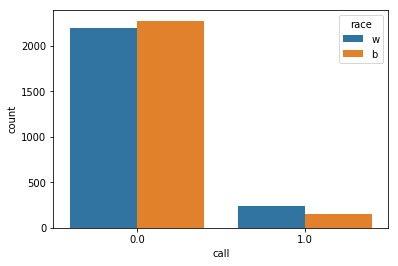

In [14]:
# countplot of calls by races on resumes
sns.countplot(x=data.call, hue=data.race)

In [15]:
# We separate the data into two race classes
w = data[data.race=='w']
b = data[data.race=='b']

# Total number of resumes for each race
n_w = len(w)
n_b = len(b)

# Proportion of resume callbacks for the races
prop_w = np.sum(w['call']) / n_w
prop_b = np.sum(b['call']) / n_b
print('Proportion of resume calls for white race: ', prop_w)
print('Proportion of resume calls for black race: ', prop_b)

# Difference in proportion of resumes being called
prop_diff = prop_w - prop_b
print('The difference in propor. of resume calls: ', prop_diff)

Proportion of resume calls for white race:  0.09650924024640657
Proportion of resume calls for black race:  0.06447638603696099
The difference in propor. of resume calls:  0.032032854209445585


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

## What test is appropriate for this problem? Does CLT apply?

- Given that the problem above has a sample size greater than 30 with a binomial population ('blacks' and 'whites') and the population standard deviation is unknown, we should use a 2-sample t-test for the sample proportion of resume callbacks. 

- According to the Central Limit Theorem, if you have a population with mean "μ" and standard deviation "σ" and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed.

- Hence, given that we have a large random sample (blacks / whites = 2435), the Central Limit Theorem would apply here.


## What are the null and alternate hypotheses?

- The above descriptive statistics give evidence in favor of a difference in resume calls for different races but we need to establish the signnificance of this difference. 

- Null Hypothesis: There is no difference in the proportion of resume calls for white and black races.

$$H_0: \hat p_{white\_resumecalls} - \hat p_{black\_resumecalls} = 0$$

- Alternative Hypothesis: There is a significant (non-zero) difference in the proportion of resume calls for white and black races.

$$H_a: {\hat p_{white\_resumecalls}} - {\hat p_{black\_resumecalls}} \neq 0$$

- At a 5% significance Level or 95% Confidence level

$$\alpha = 0.05$$



Your solution to #3 here:

## Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [16]:
# Standard error
s_error = np.sqrt(w['call'].var()/n_w + b['call'].var()/n_b)

# Margin of error = Critical value x Standard error of the statistic
m_error = 1.96 * s_error
print('Margin of error:', m_error)

# Confidence Interval
c_int = prop_diff + (np.array([-1, 1]) * m_error)
print('Confidence interval:', c_int)

# T-score
t_stat, p = stats.ttest_ind(w['call'],b['call'],equal_var=False)
print('t-statistic: ', t_stat)

# p-value
p_value = stats.norm.cdf(-t_stat) * 2
print('p-value:', p_value)

# odds of picking a white versus black resumes
odds = prop_w/prop_b


Margin of error: 0.015258417380692
Confidence interval: [0.01677444 0.04729127]
t-statistic:  4.114705290861751
p-value: 3.876744018936831e-05


# Frequentist Bootstrapping

In [17]:
# Resample from the same population with the assumption that there is no difference between the two proportions.

df = data[['race','call']]

def get_prop_diff(sample1, sample2):
    
    prop_w = np.sum(sample1['call'] == 1)/len(sample1)
    prop_b = np.sum(sample2['call'] == 1)/len(sample2)
    
    return abs(prop_w-prop_b)
    
def get_bs_samples_diff(sample1, sample2, func, size):
    length1 = len(sample1)
    length2 = len(sample2)
    bs_prop_diffs = np.empty(size)
    
    for i in range(size):
        combined_sample = pd.concat([sample1,sample2])
        shuffled_sample = combined_sample.sample(length1+length2).reset_index(drop=True)

        new_sample1 = shuffled_sample.iloc[:length1,:]
        new_sample2 = shuffled_sample.iloc[length1:,:]
        
        bs_prop_diffs[i] = func(new_sample1,new_sample2)
        
    return bs_prop_diffs

bs_samples_diff = get_bs_samples_diff(df[df.race=='w'], df[df.race=='b'], get_prop_diff, 10000)
print(bs_samples_diff[:5])

[0.0073922  0.0073922  0.00082136 0.0073922  0.00082136]


In [18]:
# p value
p = np.sum(bs_samples_diff > prop_diff)/len(bs_samples_diff)
print(p)

0.0


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

## Write a story describing the statistical significance in the context or the original problem.

- In the context of the original problem, we performed our analysis to determine if there was a difference between proportion of resume calls between black & white sounding names.

- From the above analysis, race has a significant role on resume call backs. 

- We performed a 2 sample t-test and frequentist bootstrapping. 

- The p-value for the t-test and bootstrapping are both lower than 0.05 and hence we can reject the null hypothesis, implying that there is a significnt difference between the proportion of call backs for white and black.

- But we need to check for other confounding factors such as sex, education, years of experience (yearsexp).


## Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

- From the above analysis, race has a significant role on resume call backs. The p-values are both lower than 0.05 and hence we can reject the null hypothesis, implying that there is a significant difference between the proportion of call backs for white and black races.

- We need to change the above analysis incorporating education, years of experience, sex etc. These are confounding factors which might impact the call back rates for resumes.

# Examining other confounding factors such as sex.

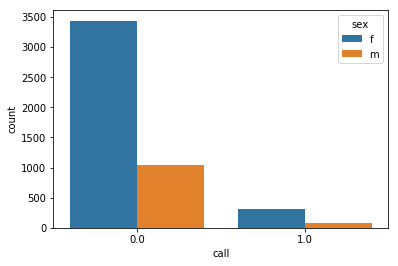

In [19]:
# Examining a frequency graph of callback status by sex:
sns.countplot(x=data.call, hue=data.sex)

# This leads us to conclude from the sample data from the US labor markets that although race has a significant impact on resume callback rates, there are other factors that need to be controlled for such as sex, education and years of experience. 